# Families of Continuous Distributions
- Typically, the PDF, $f(x;\theta)$, is parameterized by the *parameter* $\theta\in\Theta$. Hence, technically a family of continuous distributions is the collection of PDFs $f(\cdot; \theta)$ for all $\theta\in\Theta$.
- Create a distribution object for each of the continuous distributions we cover.

In [1]:
using Distributions
dists = [
    Uniform(10,20),
    Exponential(3.5),
    Gamma(0.5,7),
    Beta(10,0.5),
    Weibull(10,0.5),
    Normal(20,3.5),
    Rayleigh(2.4),
    Cauchy(20,3.5)]

println("Distributions \t\t\t Parameters \t Support")
reshape([dists; params.(dists); ((d) -> (minimum(d), maximum(d))).(dists)],
    length(dists),3)

Distributions 			 Parameters 	 Support


8×3 Matrix{Any}:
 Uniform{Float64}(a=10.0, b=20.0)  (10.0, 20.0)  (10.0, 20.0)
 Exponential{Float64}(θ=3.5)       (3.5,)        (0.0, Inf)
 Gamma{Float64}(α=0.5, θ=7.0)      (0.5, 7.0)    (0.0, Inf)
 Beta{Float64}(α=10.0, β=0.5)      (10.0, 0.5)   (0.0, 1.0)
 Weibull{Float64}(α=10.0, θ=0.5)   (10.0, 0.5)   (0.0, Inf)
 Normal{Float64}(μ=20.0, σ=3.5)    (20.0, 3.5)   (-Inf, Inf)
 Rayleigh{Float64}(σ=2.4)          (2.4,)        (0.0, Inf)
 Cauchy{Float64}(μ=20.0, σ=3.5)    (20.0, 3.5)   (-Inf, Inf)

## Continuous Uniform Distribution
- The ***continuous uniform distribution*** describes the case where the outcome of a continuous random variable $X$ has a constant likelihood of occuring over some finite intervel. Since the integral of the PDF must equal one, given an interval $(a,b)$, the PDF is given by
$$
f(x) = 
\begin{cases}
  \frac{1}{b-a} & \text{for } a \le x \le b, \\
  0 & \text{for } x<a \text{ or } x>b.
\end{cases}
$$
- ***Example*** consider the case of a fast spinning circular disk, such as a hard drive. Imagine now there is a small defect on the disk, and we define $X$ as the clockwise angle (in radians) the defect makes with the read head at an arbitary time. In this case, $X$ is modeled by the continous uniform distribution over $x\in[0,2\pi]$.


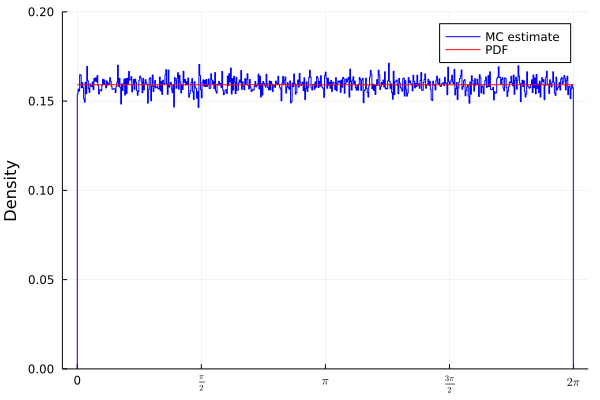

In [2]:
using Distributions, Plots, LaTeXStrings; gr()

cUnif = Uniform(0,2π)
xGrid, N = 0:0.01:2π, 10^6

stephist(rand(N)*2π, bins=xGrid,
    normed=:true, c=:blue,
    label="MC estimate")
plot!(xGrid, pdf.(cUnif, xGrid), 
    c=:red, ylims=(0,0.2),label="PDF",ylabel="Density",xticks=(collect(0:π/2:2π),
    ["0", L"\dfrac{\pi}{2}", L"\pi", L"\dfrac{3\pi}{2}", L"2\pi"]))

## Exponential Distribution
- ***Exponential Distribution*** is used to model random durations between occurrences. A non-negative random variable $X$, exponentially distributed with a rate parameter $\lambda > 0$, has PDF
$$
f(x) = \lambda e^{-\lambda x}
$$
  - ***mean*** $1/\lambda$
  - ***variance*** $1/\lambda^{2}$
  - ***CCDF*** $\bar{F}(x) = e^{\lambda x}$
- ***In Julia, exponentially distribution is parameterized by the mean, rather than by $\lambda$***
- Exponential random variables has a ***lack of memory*** propety.
$$
\mathbb{P}(X>t+s\vert X>t) = \mathbb{P}(X>s)
$$
  - A similar property holds for geometric random variables. This hint at the fact that ***exponential random variables are the continuous analogs of geometric random variables.*** Consider a transform of an exponential random variable $X,Y=\lfloor{X}\rfloor$ ($\lfloor\cdot\rfloor$ represents the mathematical ***floor funciton***.) In this case, $Y$ is no longer a continuous random variable, but is discrete in nature.
$$
p_{Y}(y) = \mathbb{P}(\lfloor{X}\rfloor = y) = \int_{y}^{y+1}\lambda e^{-\lambda x} dx = (e^{-\lambda})^{y}(1-e^{-\lambda})\quad \text{for } y=0,1,2,\cdots
$$
- If we set $p=1-e^{-\lambda}$, we observe that $Y$ is a geometric random variable which starts at $0$ and has success parameter $p$.

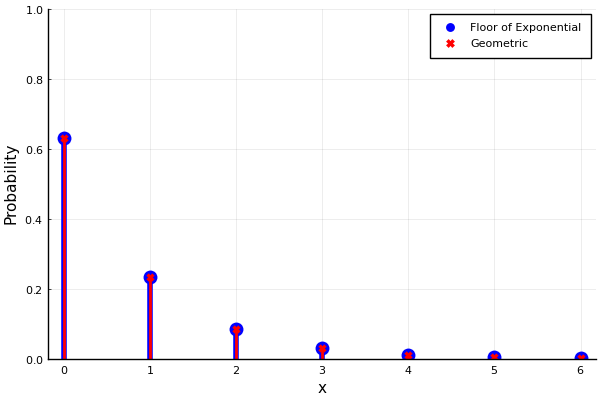

In [3]:
using StatsBase,Distributions, Plots; pyplot()

lambda, N = 1, 10^6
xGrid = 0:6

expDist = Exponential(1/lambda)
floorData = counts(convert.(Int, floor.(rand(expDist, N))), xGrid) / N
geomDist = Geometric(1-MathConstants.e^(-lambda))

plot(xGrid, floorData, 
    line=:stem, marker=:circle,
    c=:blue, ms=10, msw=0, lw=4,
    label="Floor of Exponential")
plot!(xGrid, pdf.(geomDist, xGrid),
    line=:stem, marker=:xcross,
    c=:red, ms=6, msw=0, lw=2,
    label="Geometric", ylims=(0,1),
    xlabel="x", ylabel="Probability")

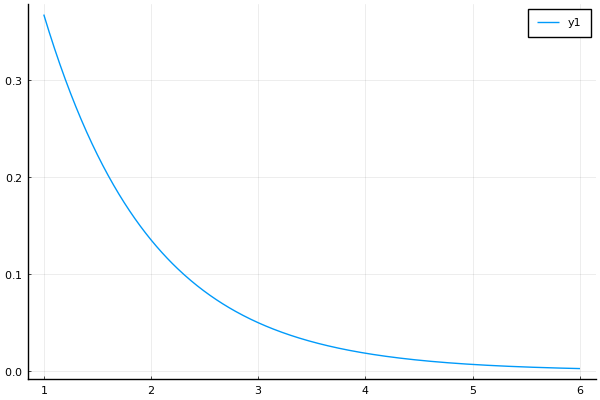

In [4]:
xGrid2 = 1:0.01:6
plot(xGrid2, pdf.(expDist, xGrid2))

## Gamma Distribution and the Squared Coefficient of Variation
- The ***gamma distribution*** is commonly used for modeling asymmetric non-negative data.It generalizes the exponential distribution and chi-squared distribution.
- ***Example*** The lifetimes of light bulbs are exponentially distributed with mean $\lambda^{-1}$. Now imagine we are lighting a room continuously with a single bulb, and that we replace the bulb with a new one when it burns out. If we starts at time $0$, what is the distribution of time until $n$ bulbs are replaced?
  - One way to describe this time is by the random variable $T$, where
$$
T = X_{1} + X_{2} + \cdots + X_{n}
$$
  - The PDF of the gamma distribution is a function (in $x$) proportional to $x^{\alpha-1}e^{-\lambda x}$, where the non-negative parameters $\lambda$ and $\alpha$ are called the ***rate parameter*** and ***shape parameter***, respectively. In order to normalize the function, we need to divide by
$$
\int_{0}^{\infty}x^{\alpha -1}e^{-\lambda x} dx.
$$
  - this integral can be represented by $\Gamma(\alpha)/\lambda^{\alpha}$, where $\Gamma(\cdot)$ is a well-known mathmatical special function called the ***gamma function***
$$
\Gamma(z) = \int_{0}^{\infty}x^{z-1}e^{-x} dx
$$
  - thus the PDF of gamma distribution is
$$
f(x) = \frac{\lambda^{\alpha}}{\Gamma(\alpha)} x^{\alpha -1}e^{-\lambda x}
$$
  - In the light bulbs case, we have that $T\sim \text{Gamma}(n,\lambda)$, with shape parameter $\alpha=n$. In general for a gamma random variable, $Y\sim {\rm Gamma}(\alpha,\lambda)$, the shape parameter $\alpha$ does not have to be a whole number. It can analytically be evaluated that
$$
\mathbb{E}[Y] = \frac{\alpha}{\lambda}\quad\text{ and }\quad {\rm Var}[Y] = \frac{\alpha}{\lambda^{2}}
$$
  - The ***squared coefficient of variation*** 
$$
{\rm SCV} = \frac{\text{Var}(Y)}{\mathbb{E}[Y]^{2}}
$$
- Simulation by Julia
  - set the rate parameter for the light bulbs at $\lambda n$
  - ***Note that the Julia funciton `Gamma()` is not parameterized by $\lambda$, but by $1/\lambda$*** 


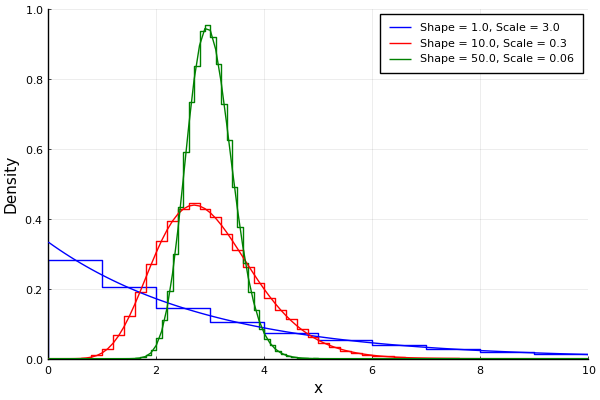

In [5]:
using Distributions, Plots; pyplot()

lambda, N = 1/3, 10^5
bulbs = [1,10,50]
xGrid = 0:0.1:10
C = [:blue :red :green]
dists = [Gamma(n, 1/(n*lambda))  for n in bulbs]

function normalizeData(d::Gamma)
    sh = Int64(shape(d))
    data = [sum(-(1/(sh*lambda))*log.(rand(sh))) for _ in 1:N] # using inverse probability transform to generating the random values which from the exponential distribution
end

L = ["Shape = "*string.(shape.(i))*", Scale = "*
    string.(round.(scale.(i), digits=2)) for i in dists]

stephist(normalizeData.(dists), bins=50,
    normed=:true, c=C, xlims=(0,maximum(xGrid)), ylims=(0,1),
    xlabel="x", ylabel="Density", label="")
plot!(xGrid, [pdf.(i,xGrid) for i in dists], c=C, label=reshape(L,1,:))

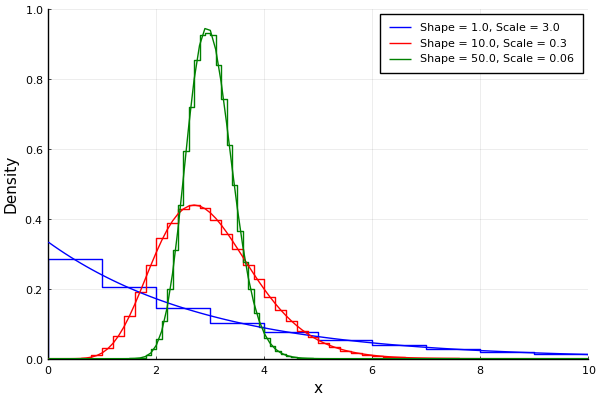

In [6]:
using Distributions, Plots; pyplot()

lambda, N = 1/3, 10^5
bulbs = [1,10,50]
xGrid = 0:0.1:10
C = [:blue :red :green]
dists = [Gamma(n, 1/(n*lambda))  for n in bulbs]

function normalizeData2(d::Gamma)
    sh = Int64(shape(d))
    data = [sum(rand(Exponential(1/(sh*lambda)), sh)) for _ in 1:N]
end

L = ["Shape = "*string.(shape.(i))*", Scale = "*
    string.(round.(scale.(i), digits=2)) for i in dists]

stephist(normalizeData2.(dists), bins=50,
    normed=:true, c=C, xlims=(0,maximum(xGrid)), ylims=(0,1),
    xlabel="x", ylabel="Density", label="")
plot!(xGrid, [pdf.(i,xGrid) for i in dists], c=C, label=reshape(L,1,:))

## Beta Distribution and Mathematical Special Functions
### Beta Distribution 
- The ***beta distribution*** is a commonly used distribution when seeking a parameterized shape over a finite support. It is parameterized by two non-negative parameters, $\alpha$ and $\beta$. It has a density proportional to $x^{\alpha -1}(1-x)^{\beta -1}$ for $x\in[0,1]$. By using different positive values of $\alpha$ and $\beta$, a variety of shapes can be produced. One common example is $\alpha=1,\beta=1$, in which cas the distribution defaults to the uniform(0,1) distribution.
- In order to normalize the distribution, we use
$$
K = \frac{1}{\displaystyle \int_{0}^{1}x^{\alpha-1}(1-x)^{\beta -1}dx}
$$
- Hence the PDF is $f(x) = Kx^{\alpha-1}(1-x)^{\beta-1}$.
- Using the gamma function $(\Gamma(\cdot))$ above, we can represent $K$ by (mathematically, this is called the inverse of the ***beta function***)
$$
K = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}.
$$

### Gamma function
- The ***gamma function*** is a type of special function, and is defined as
$$
\Gamma(z) = \int_{0}^{\infty}x^{z-1}e^{-x}dx
$$
- **It is a continuous generalization of factorial.** We know that for positive integer $n$,
$$
n!=n\cdot(n-1)!, \quad \text{with }0!\equiv1.
$$
- The gamma function exhibits similar propertiex, and one can evaluate it via integration by parts,
$$
\Gamma(z) = (z-1)\cdot\Gamma(z-1)
$$
- Note furthermore that, $\Gamma(1)=1$. Hence, we see that for integer values of $z$,
$$
\Gamma(z) = (z-1)!
$$
- In Julia, `gamma()` and `beta()` are special mathematical functions, but `Gamma()` and `Beta()` are the constructor for the distribution.

In [7]:
using SpecialFunctions, Distributions

a, b = 2, 7
x = 0.75

betaAB1 = beta(a,b)
betaAB2 = (gamma(a)gamma(b))/gamma(a+b)
betaAB3 = (factorial(a-1)factorial(b-1))/factorial(a+b-1)
betaPDFAB1 = pdf(Beta(a,b),x)
betaPDFAB2 = (1/beta(a,b))*x^(a-1)*(1-x)^(b-1)

println("beta($a, $b) = $betaAB1,\t$betaAB2,\t$betaAB3")
println("betaPDF($a, $b) at $x = $betaPDFAB1,\t$betaPDFAB2")

beta(2, 7) = 0.01785714285714285,	0.017857142857142856,	0.017857142857142856
betaPDF(2, 7) at 0.75 = 0.010253906250000003,	0.010253906250000005


- Another property of the gamma function is that $\Gamma(1/2)=\sqrt{\pi}$

In [8]:
using QuadGK, SpecialFunctions

g(x) = x^(0.5-1)*MathConstants.e^(-x)
quadgk(g, 0, Inf)[1], sqrt(pi), gamma(1/2)

(1.7724538355037909, 1.7724538509055159, 1.772453850905516)

## Weibull Distribution and Hazard Rates
- The ***Weibull distribution*** and ***hazard rate function*** is often used in ***reliability analysis*** and ***survival analysis***. For a random variable $T$, representing the lifetime of an individual or a component, an interesting quantity if the instantaneous chance of failure at any time, given that the component has been operating without failure up to time $x$. This can be expressed as
$$
h(x) = \lim_{\Delta\to 0}\frac{1}{\Delta}\mathbb{P}(T\in[x,x+\Delta) | T > x)
$$
- Alernatively, by using the conditional probability and the PDF $f(x)\Delta\approx\mathbb{P}(x\le T < x+\Delta)$ for small $\Delta$, we can express the above as
$$
h(x) = \frac{f(x)}{1-F(x)}
$$
- Here the function $h(\cdot)$ is called the hazard rate, and it is a common method of viewing the distribution for lifetime random variable $T$. In fact, we can reconstruct the CDF $F(x)$ by
$$
1 - F(x) = \exp\bigg(-\int_{0}^{x}h(t)dt\bigg)
$$
- Hence, every continuous non-negative random variable can be described uniquely by its hazard rate. The ***Weibull distribution*** is naturally defined through the hazard rate by considering hazard rate function that have a specific form. It is a distribution with (where $\lambda$ is positive and $\alpha$ takes on any real value.)
$$
h(x) = \lambda x^{\alpha -1}
$$
  - If $\alpha=1$ then the hazard rate is constant, in which case the Weibull distribution is actually an exponential distribution with rate $\lambda$. If $\alpha>1$, then the hazard increases over time. This depicts a situation of "aging components", i.e. the longer a component has live, the higher the instantaneous chance of failure. This is called ***Increasing Failure Rate (IFR)***. Conversely, $\alpha<1$ depicts a situation where the longer a component has lasted, the lower the chance of its failing. This is called ***Decreasing Failure Rate (DFR)***.
- Based on the formulas above, we can obtain the CDF and PDF
$$
F(x) = 1 - e^{-\frac{\lambda}{\alpha}x^{\alpha}}, \quad \text{and} \quad f(x) = \lambda x^{\alpha-1}e^{-\frac{\lambda}{\alpha}x^{\alpha}}.
$$
- In Julia, the distribution is parameterized slightly differently via
$$
\begin{split}
&f(x) = \frac{\alpha}{\theta}\bigg(\frac{x}{\theta}\bigg)^{\alpha -1}e^{(-x/ \theta)^{\alpha}} = \alpha\theta^{-\alpha}x^{\alpha-1}e^{-\theta^{-\alpha}x^{\alpha}} \\\\
&\text{where } \theta = \bigg(\frac{\alpha}{\lambda}\bigg)^{1/\alpha}\quad \text{and}\quad \lambda = \alpha\theta^{-\alpha}
\end{split}
$$
  - In this case, $\theta$ is called the scale parameter and $\alpha$ is the shape parameter.

Maximum difference between two implementations of hazard: 1.7763568394002505e-15


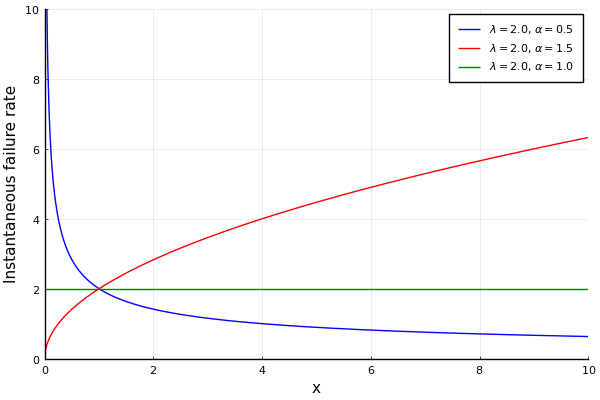

In [9]:
using Distributions, Plots, LaTeXStrings; pyplot()

alphas = [0.5, 1.5, 1]
lam = 2

toLambda(dist::Weibull) = shape(dist)*scale(dist)^(-shape(dist))
theta(lam, alpha) = (alpha/lam)^(1/alpha)

dists = [Weibull.(a, theta(lam, a)) for a in alphas]

hA(dist,x) = pdf(dist, x)/ccdf(dist, x)
hB(dist, x) = toLambda(dist)*x^(shape(dist)-1)

xGrid = 0.01:0.01:10
hazardA = [hA.(d, xGrid) for d in dists]
hazardB = [hB.(d, xGrid) for d in dists]

println("Maximum difference between two implementations of hazard: ",
    maximum(maximum.(hazardA-hazardB)))

Cl = [:blue :red :green]
Lb = [L"\lambda=" * string(toLambda(d)) * ", " * L"\alpha=" * string(shape(d)) 
    for d in dists]
plot(xGrid, hazardA, c=Cl, label=reshape(Lb,1,:), xlabel="x", 
    ylabel="Instantaneous failure rate", xlims=(0,10), ylims=(0,10))

## Gaussian (Normal) Distribution
- The ***Gaussian distribution*** is a symmetric "**bell curved**"-shaped distritbution. Examples include the distribution of heights among adult humans and noise disturbances of electrical signals.
- The Guassian distribution is defined by two parameters $\mu$ and $\sigma^{2}$, which are the mean and variance respectively. ***Standard normal*** signifies the case of a normal distribution with $\mu=0$ and $\sigma^{2}=1$, the PDF is
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}
$$
- The CDF of the normal distribution is not available as a simple expression. However, it is frequently needed and hence stastical tables or software are often used. The CDF of the standard normal variable is
$$
\Phi(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi}}e^{-\frac{t^{2}}{2}}dt = \frac{1}{2}\bigg(1 + \text{erf}(\frac{x}{\sqrt{2}})\bigg)
$$
  - The $\text{erf}(\cdot)$ is the ***error function***. It is a mathematical special function defined as
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x}e^{-t^{2}}dt
$$
- With $\Phi(\cdot)$ tabulated, one can move to a general normal random variable with mean $\mu$ and variance $\sigma^{2}$. In this case, the CDF is available via
$$
\Phi\bigg(\frac{x-\mu}{\sigma}\bigg)
$$
- Plot standard normal PDF, along with its first and second derivatives in Julia


Maximum difference between two CDF implementations: 1.1102230246251565e-16


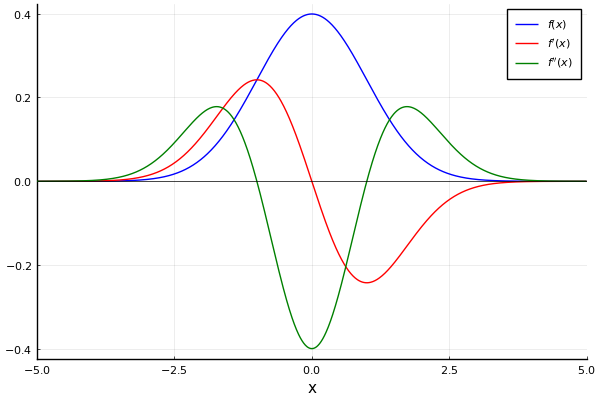

In [10]:
using Distributions, Calculus, SpecialFunctions, Plots, LaTeXStrings; pyplot()

xGrid = -5:0.01:5

PhiA(x) = 0.5*(1+erf(x/sqrt(2)))
PhiB(x) = cdf(Normal(),x)

println("Maximum difference between two CDF implementations: ",
    maximum(PhiA.(xGrid) - PhiB.(xGrid)))

normalDensity(z) = pdf(Normal(),z)

d0 = normalDensity.(xGrid)
d1 = derivative.(normalDensity, xGrid)
d2 = second_derivative.(normalDensity, xGrid)

plot(xGrid, [d0 d1 d2], c=[:blue :red :green], label=[L"f(x)" L"f'(x)" L"f''(x)"])
plot!([-5,5],[0,0], color=:black, lw=0.5, xlabel="x", xlims=(-5, 5), label="")

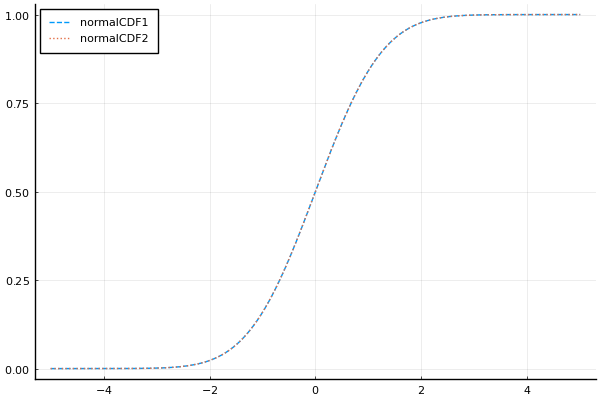

In [11]:
using Distributions, Plots; pyplot()
xGrid = -5:0.01:5
normalCDF1(x) = cdf(Normal(),x)
normalCDF2(x) =sum([pdf(Normal(),t)*0.001 for t in -100:0.001:x])

plot(xGrid, [normalCDF1.(xGrid) normalCDF2.(xGrid)], line=[:dash :dot],
    label=["normalCDF1" "normalCDF2"], legend=:topleft)

## Rayleigh Distribution and Box-Muller Transform
### Rayleigh Distribution
- Consider an exponentially distributed random variable, $X$, with rate parameter $\lambda=\sigma^{-2}/2$ where $\sigma > 0$. If we set a new random variable, $R=\sqrt{X}$
$$
F_{R}(y) = \mathbb{\sqrt{X}\le y} = \mathbb{X \le y^{2}} = F_{X}(y^{2}) = 1-\exp\bigg(-\frac{y^{2}}{2\sigma^{2}}\bigg),
$$
- Thus, by differentiating, we get the density (***Rayleigh Distribution*** with parameter $\sigma$)
$$
f_{R}(y) = \frac{y}{\sigma^{2}}\exp\bigg(-\frac{y^{2}}{2\sigma^{2}}\bigg)
$$
- Consider two indepenent normally distributed random variables, $N_{1}$ and $N_{2}$, each with mean $0$ and standard deviation $\sigma$. Thee $\tilde{R} = \sqrt{N_{1}^{2} + N_{2}^{2}}$ is Rayleigh distributed just as $R$ above. This property yields a method for generating normal random variables. It also yields a stastical model often uesed in radio communication called ***Rayleigh fading***.

[2.1309969895700465, 2.1304634508886053, 2.1292020616665392]


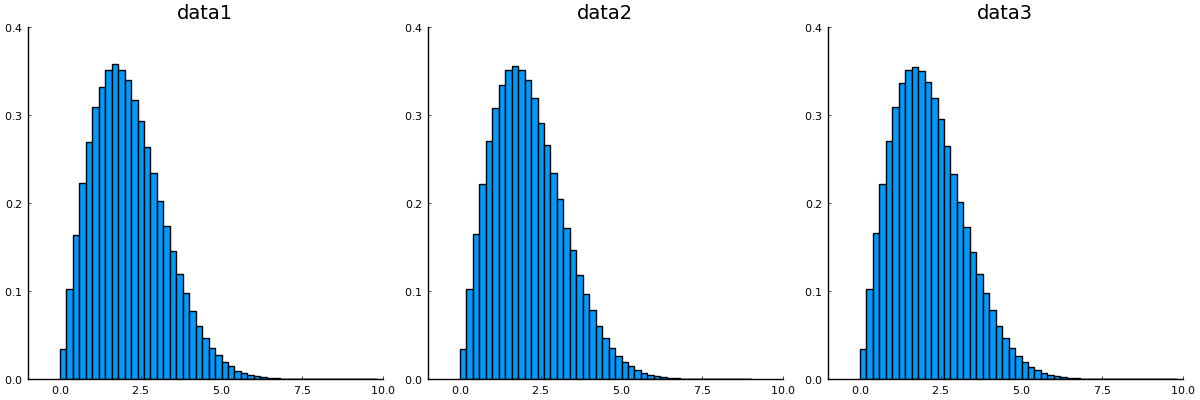

In [12]:
using Distributions, Random, Plots; pyplot()
Random.seed!(1)

N = 10^6
sig = 1.7

data1 = sqrt.(-(2*sig^2)*log.(rand(N)))

distG = Normal(0,sig)
data2 = sqrt.(rand(distG,N).^2 + rand(distG,N).^2)

distR = Rayleigh(sig)
data3 = rand(distR,N)

println(mean.([data1, data2, data3]))


p1 = histogram(data1, normed=:true, bins=50, label="", title="data1")
p2 = histogram(data2, normed=:true, bins=50, label="", title="data2")
p3 = histogram(data3, normed=:true, bins=50, label="", title="data3")

plot(p1,p2,p3, layout=(1,3),size=(1200,400), xlims=(-1,10),ylims=(0,0.4), grid=:none)

### Box-Muler Transform — A way to generating Normally distributed random variables
![](https://cdn.jsdelivr.net/gh/BNUPsycher/picture-host/BoxMullerTransformUsingPolarCoordinates.png)
- Consider the relationship between the pair $(N_{1}, N_{2})$ and their ***polar coordinate*** counterparts, $R$ and $\theta$. Assume now that the Cartesian coordinates of points $(N_{1},N_{2})$ are identically normally distributed, with $N_{1}$ independent of $N_{2}$ and set $\sigma=1$. In this case, by representing $N_{1}$ and $N_{2}$ in polar coordinates $(\theta,R)$ we have that the angle $\theta$ is uniformly distributed on $[0,2\pi]$ and the radius $R$ is distributed as a Rayleigh random variable.
$$
N_{1} = R\cos(\theta)\quad \text{and}\quad N_{2} = R\sin(\theta)
$$
- Often $N_{2}$ is not needed. Hence, in practice, given two independent uniform(0,1) random variables $U_{1}$ and $U_{2}$, we can get the standard normal distribution $Z$
$$
Z = \sqrt{-2\ln U_{1}}\cos(2\pi U_{2})
$$
- Simulation by Julia

In [13]:
using Distributions, Random, Plots; plotly()
Random.seed!(1)

Z() = sqrt(-2*log(rand()))*cos(2π*rand())
xGrid = -4:0.01:4

histogram([Z() for _ in 1:10^6], bins=50,
    normed=:true, label="MC estimate")
plot!(xGrid, pdf.(Normal(), xGrid),
    c=:red, lw=4, label="PDF",
    xlims=(-4,4), ylims=(0,0.5), xlabel="x", ylabel="f(x)")

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/zpp/.julia/packages/Plots/Xv2qA/src/backends.jl:432


## Cauchy Distribution
- The ***Cauchy Distribution***, also known as the ***Lorentz distribution***. At first glance, a plot of PDF looks very similar to the normal distribution. However, it is fundamentally different as its mean and standard deviation are undefined. The PDF of Cauchy distribution is (where $x_{0}$ is the location parameter at which the peak is observed and $\gamma$ is the scale parameter.)
$$
f(x) = \frac{1}{\displaystyle\pi\gamma\bigg(1 + \big(\frac{x-x_{0}}{\gamma}\big)^{2}\bigg)}
$$
- Consider a drone hovering stationary in the sky at unit height. A pivoting laser is attached to its undercarriage, which pivots back and forth as it shoots pulses at the ground. At any point the laser fires, it makes an angle $\theta$ from the vertical $(-\pi/2 \le \theta\le\pi/2)$. Since the laser fires at a high frequency as it is pivoting, we can assume that the angle $\theta$ is distributed uniformly on $[-\pi/2, \pi/2]$. For each shot from the laser, a point can be measured, $X$, horizontally on the ground from the point above which the drong is hovering. We can consider the horizontal measurement as a new random variable, $X$. Hence, the CDF is
$$
F_{X}(x) = \mathbb{P}(\tan(\theta)\le x) = \mathbb{P}(\theta \le \text{atan}(x)) = F_{\theta}(\text{atan}(x)) = \left\{
\begin{array}{ll}
  0, & \text{atan}(x) \le -\pi/2\\
  \frac{1}{\pi}\text{atan}(x),  & \text{atan}(x)\in(-\pi/2, \pi/2)\\
  1, & \text{atan}(x) \ge \pi/2
\end{array}
\right.
$$
- Thus the PDF is
$$
f(x) = \frac{1}{\pi(1+x^{2})}
$$
- This is a special case of Cauchy distribution, with $\gamma=1$ and $x_{0}=0$.
- Importantly, the expectional integral, 
$$
\int_{-\infty}^{\infty}xf(x)dx
$$
- is not defines since each of the one-sided improper integrals does not converge. Hence, a Cauchy random vairable is an exaple of a ***distribution without a mean.*** 
- Simulation by Julia to illustate the mena of Cauchy distribution is not converge.
  - `accumulate(op, A; dims::Int, [init])`

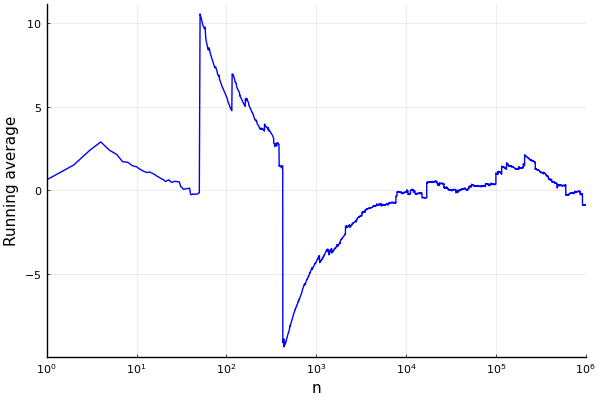

In [14]:
using Random, Plots; pyplot()
Random.seed!(4)

n = 10^6
data = tan.(rand(n)*pi .- pi/2)
averages = accumulate(+, data)./collect(1:n)

plot(1:n, averages,
    c=:blue, legend=:none,
    xscale=:log10, xlims=(1,n), xlabel="n", ylabel="Running average")